# Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#Define Functions

In [16]:
# Function to compute the cost for a given set of weights (w) and bias (b)
def compute_cost(X, y, w, b, plot=0):
    m = X.shape[0]
    f_wb = w * X + b
    total_cost = 1 / (2 * m) * np.sum((f_wb - y) ** 2)
    axs[plot, 0].plot((X[0], m), (w*X[0]+b, w*m+b))
    return total_cost

# Function to compute the total cost for a range of weights and biases
def compute_total_cost(X, y, w_array, b_array):
    cost = np.zeros((w_array.shape[0], b_array.shape[0]))
    for w in range(len(w_array)):
        for b in range(len(b_array)):
            tmp_w = w_array[w]
            tmp_b = b_array[b]
            cost[w][b] = compute_cost(X, y, tmp_w, tmp_b)
    return cost

# Function to compute costs for a range of biases for a fixed weight
def func_b(X, y, w, b_array, plot):
    cost = np.zeros(b_array.shape)
    for b in range(len(b_array)):
        tmp_b = b_array[b]
        cost[b] = compute_cost(X, y, w, tmp_b, plot)
    return cost


# Function to compute costs for a range of weights for a fixed bias
def func_w(X, y, w_array, b, plot):
    cost = np.zeros(w_array.shape)
    for w in range(len(w_array)):
        tmp_w = w_array[w]
        cost[w] = compute_cost(X, y, tmp_w, b, plot)
    return cost

# Read BTC price data from a CSV file and extract features for X and target variable for y

In [17]:
df = pd.read_csv("BTC-USD.csv")

X = np.arange(len(df["Open"]))
y = df["Open"]

# Plotting the cost function for different weights and a fixed bias

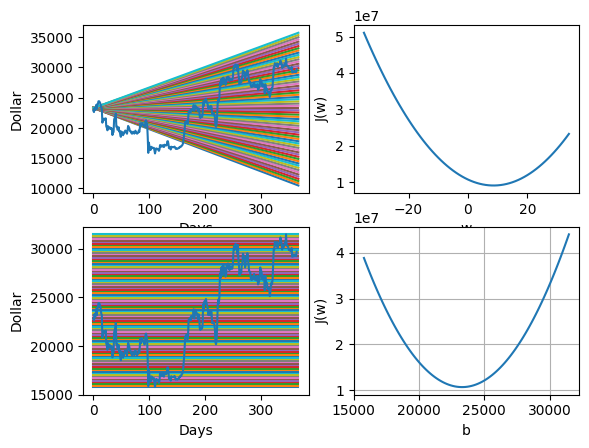

In [18]:
fig, axs = plt.subplots(2, 2)

w_array = np.arange(-35, 35)
b_array = np.round(np.linspace(y.min(), y.max(), 100))

### ----> for J(w) or J(b) <---- ###
b = y.mean()
cost_func_2d_w = func_w(X,y,w_array,b,0)
w = 0
cost_func_2d_b = func_b(X,y,w,b_array,1)
axs[0, 0].plot(X,y)
axs[0, 1].plot(w_array,cost_func_2d_w)
axs[1, 0].plot(X,y)
axs[1, 1].plot(b_array,cost_func_2d_b)
axs[0, 0].set(xlabel="Days",ylabel="Dollar")
axs[0, 1].set(xlabel ="w",ylabel="J(w)")
axs[1, 0].set(xlabel="Days",ylabel="Dollar")
axs[1, 1].set(xlabel ="b",ylabel="J(w)")

plt.grid()
plt.show()

# Compute and plot the 3D cost function for different weights and biases

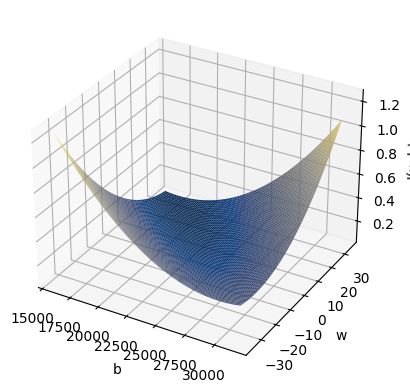

In [19]:
cost_func = compute_total_cost(X,y,w_array,b_array)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y = np.meshgrid(b_array,w_array)
surf =ax.plot_surface(x,y,cost_func,rstride=1, cstride=1,
                       linewidth=0,cmap='cividis')

ax.set_xlabel("b")
ax.set_ylabel("w")
ax.set_zlabel("J(w,b)")
plt.show()
